<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/guia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos
from math import sin
from math import pi


Escribir un programa que implemente el método de Euler explícito para resolver ecuaciones de la forma
$$
y' = f(t, y)
$$
$$
y(t_0) = y_0,
$$
tomando como parámetros la función $f$, los tiempos inicial y final $t_0$ y $t_f$, el paso $h$ y el dato
inicial $y_0$; y arrojando como resultados el vector $t = (t_0, t_0 + h, \ldots, t_f)$ y la solución $y$.


In [6]:
def euler(a,b,N,f,x0):
  h = (b-a)/N
  t = np.linspace(a,b,N+1)
  x = np.zeros(N+1)
  x[0] = x0
  for k in range(1,N+1):
    x[k] = x[k-1] + h*f(t[k-1],x[k-1])
  return t,x



Se quiere verificar numéricamente el orden de convergencia de los métodos de Euler y Taylor de orden 2. Para ello: resolver numéricamente el problema
$$
y' = y
$$
$$
y(0) = 1,
$$
en el intervalo $[0, 1]$ con ambos métodos, tomando $h = 2^{-k}$ para $k = 2, \ldots, 8$. Para cada $h$ calcular el error que se comete al aproximar $y(1)$: $e_h = |y(1) - y_N|$. Graficar $\log(e_h)$ en función de $\log(h)$. ¿Qué se espera ver? ¿El resultado es consistente con el esperado?



0.25
0.125
0.0625
0.03125
0.015625
0.0078125
0.00390625


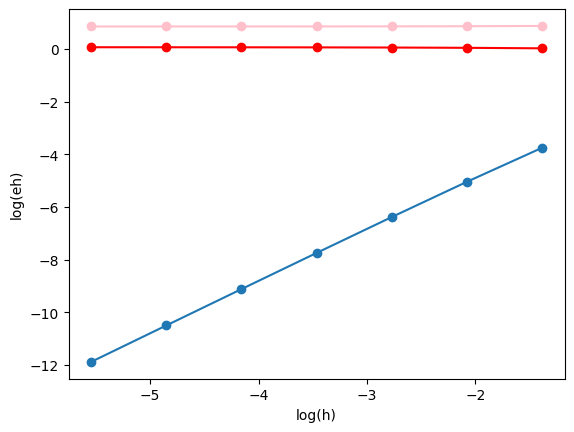

In [7]:
def ej_cinco(t,x):
    return x
def euler_modificado(a, b, f, N, x0):
    h = (b-a)/N
    t = np.linspace(a,b,N+1)
    x = np.zeros(N+1)
    x[0] = x0
    for i in range(N):
        x[i+1] = x[i] + (h/2)*f(t[i]+(h/2),x[i]+(h/2)*f(t[i],x[i]))
    return t, x


def taylor_orden_dos(a, b, f, f_t, f_x, N, x0):
    # Obtengo el paso
    h = (b - a) / N
    print(h)
    # Defino la grilla equiespaciada
    t = np.linspace(a, b, N + 1)
    # Guardo lugar para la solución de la EDO
    x = np.zeros(N+1)

    # Uso la condición inicial
    x[0]= x0
    # Obtengo la aproximación via la ecuación de recurrencia del método de Taylor
    for i in range(N):
        x[i+1] = x[i]+h*f(t[i],x[i]) + (1/2)*(f_t(t[i],x[i]) + f_x(t[i],x[i])*f(t[i],x[i]))*(h**2)

    # Devuelvo la grilla y la solución aproximada
    return t, x

def f_t(t,x):
    return 0
def f_y(t,y):
    return 1
def sol_exacta(t):
    return np.exp(t)
a = 0
b = 1
Enes = np.power(2,np.arange(2,9))
lista_h = []
error_euler = []
error_taylor = []
error_euler_ordenuno = []
for n in Enes:
    t_euler, x_euler = euler_modificado(0, 1, ej_cinco, n, 1)
    t_taylor, x_taylor = taylor_orden_dos(0, 1, ej_cinco, f_t, f_y, n, 1)
    t_uno, x_uno = euler(0,1,n,f,1)
    lista_h.append(np.log((b-a)/n))
    error_euler.append(np.log(abs(sol_exacta(1)-x_euler[-1])))
    error_taylor.append(np.log(abs(sol_exacta(1)-x_taylor[-1])))
    error_euler_ordenuno.append(np.log(abs(sol_exacta(1)-x_uno[-1])))
plt.plot(lista_h,error_euler,marker = "o", label = "euler",color = "red")
plt.plot(lista_h,error_taylor,marker = "o", label = "taylor")
plt.plot(lista_h,error_euler_ordenuno,marker = "o", label = "euler 1",color = "pink")
plt.xlabel("log(h)")
plt.ylabel("log(eh)")
plt.show()

#tiene toda la pinta de estar mal

Modificar el programa del Ejercicio 1 para que acepte ecuaciones vectoriales: la solución $y$ deberá ser una matriz de $m \times n$, donde $m$ es el número de pasos temporales y $n$ la cantidad de variables del problema. De este modo, la fila $i$ de $y$ corresponderá al valor de la solución en todas sus variables a tiempo $t_i$.

In [ ]:
def euler_nd(a, b, f, N, X0):
    ''' Resuelve un PVI n-dimensional utilizando el método de Euler.
        :params:
            a: tiempo inicial
            b: tiempo final
            f: función del t y de X (n-dimensional)
            N: cantidad de pasos
            X0: valores iniciales
        :returns:
            t: grilla equiespaciada
            X: solución aproximada en la grilla (n-dimensional)
    '''
    # Obtengo el paso
    h = (b - a) / N
    # Defino la grilla equiespaciada
    t = np.linspace(a, b, N + 1)
    # Obtengo la dimension del problema
    n = X0.size
    # Guardo lugar para la solución de la EDO
    # Vamos a guardar la solución para cada tiempo en cada fila (X[tiempo,dimension])
    X = np.empty((N+1, n))

    # Uso la condición inicial
    # Aca X[i,:] significa toda la fila i (es decir la solución que corresponde al tiempo i)
    X[0,:]= X0
    # Obtengo la aproximación via la ecuación de recurrencia del método de Euler
    for i in range(N):
        X[i+1,:] = X[i,:] + h * f(t[i],X[i,:])

    # Devuelvo la grilla y la solución aproximada
    return t, X
